# ***Modelo 1 — Regresión Logística Multiclase (RLM)***

## ***1. Conexión al Drive***

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  print("Drive montado correctamente.")
except ModuleNotFoundError:
  print("No estás en Colab, omitiendo montaje de Drive.")

Mounted at /content/drive
Drive montado correctamente.


## ***2. Librerias***

In [2]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

## ***3. Cargar datos preprocesados***

In [3]:
def cargar_datos(path_X_train, path_y_train, path_X_test, path_y_test):
    """
    Carga los datasets preprocesados desde CSV.
    Retorna: X_train, y_train, X_test, y_test
    """
    X_train = pd.read_csv(path_X_train)
    y_train = pd.read_csv(path_y_train).iloc[:,0]
    X_test = pd.read_csv(path_X_test)
    y_test = pd.read_csv(path_y_test).iloc[:,0]
    print("Datos cargados correctamente.")
    return X_train, y_train, X_test, y_test

## ***4. Entrenar el modelo***

In [4]:
def entrenar_regresion_logistica(X_train, y_train, max_iter=1000):
    """
    Entrena un modelo de regresión logística.
    """
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    print("Modelo entrenado.")
    return model

## ***5. Evaluar el modelo***

In [5]:
def evaluar_modelo(model, X_test, y_test):

    """
    Evalúa el modelo y calcula métricas de evaluación.
    """

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad clase positiva

    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()

## ***6. Guardar el modelo***

In [6]:
def guardar_modelo(model, path):
    """
    Guarda el modelo en un archivo.
    """
    # Crear carpeta si no existe
    carpeta = os.path.dirname(path)
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    # Guardar modelo
    joblib.dump(model, path)
    print(f"Modelo guardado en: {path}")

## ***7. Pipeline completo***

In [7]:
def pipeline_modelo_logistico(paths, max_iter=1000):
    """
    Pipeline que carga datos, entrena modelo, evalúa y guarda.
    paths: dict con rutas a CSV y a guardar modelo.
    """
    X_train, y_train, X_test, y_test = cargar_datos(
        paths['X_train'], paths['y_train'], paths['X_test'], paths['y_test']
    )
    model = entrenar_regresion_logistica(X_train, y_train, max_iter)
    evaluar_modelo(model, X_test, y_test)
    guardar_modelo(model, paths['modelo_guardado'])



## ***8. Ejecución***

Datos cargados correctamente.
Modelo entrenado.
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2289
           1       0.98      1.00      0.99       711

    accuracy                           0.99      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 1.0000


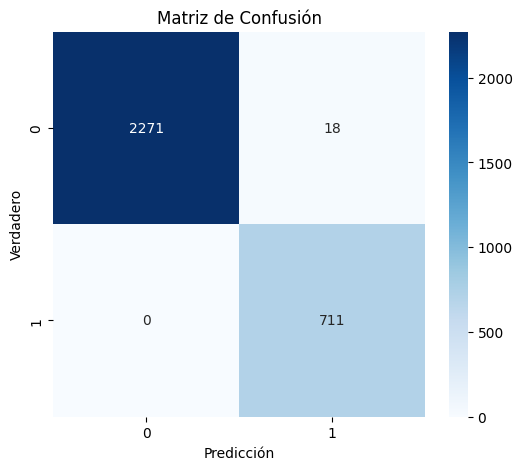

Modelo guardado en: /content/drive/MyDrive/cod/Health/HealthProjectG8/models/logistic_model.pkl


In [8]:
if __name__ == '__main__':
    paths = {
        'X_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_train.csv',
        'y_train': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_train.csv',
        'X_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/X_test.csv',
        'y_test': '/content/drive/MyDrive/cod/Health/HealthProjectG8/data/y_test.csv',
        'modelo_guardado': '/content/drive/MyDrive/cod/Health/HealthProjectG8/models/logistic_model.pkl'
    }
    pipeline_modelo_logistico(paths)